In [28]:
# Import all the required libraries
import numpy as np 
import pandas as pd 

# import date time
import datetime

#import data visualization libraries 
import seaborn as sbn 
import matplotlib.pyplot as plt

In [29]:
# import the datasets
data = pd.read_csv('movies.csv')

# lets check the size of the dataset
data.shape

(9125, 3)

In [30]:
# checking the head of the dataset
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
# import rating datset 
ratings = pd.read_csv('ratings.csv')

# checking the size of the dataset
ratings.shape

(100836, 4)

In [32]:
# Checking the head of the dataset
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# The main perform here is the content base filtering therefore have to merge both datasets.


In [33]:
# Merging two datasets into a one dataset
data = pd.merge(data, ratings, on = 'movieId', how = 'inner')

# checking the shape of the dataset
data.shape

(96811, 6)

In [34]:
# Checking the head of the dataset
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


## Here 'movieId' , 'userId' and 'timestamp' is not necessary for this model
## Therefore they have been removed as follows

In [35]:
# drop the unnecessary fields 
data = data.drop(['movieId', 'userId', 'timestamp'], axis=1)

# checking the head of the dataset
data.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


## Pivot table have been used for creating a group


In [36]:
data = pd.pivot_table(data, index=['title', 'genres'],aggfunc='mean')
data.reset_index(level=['title','genres'], inplace=True)
data.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


## Checking the distribution of each ratings accross the movies

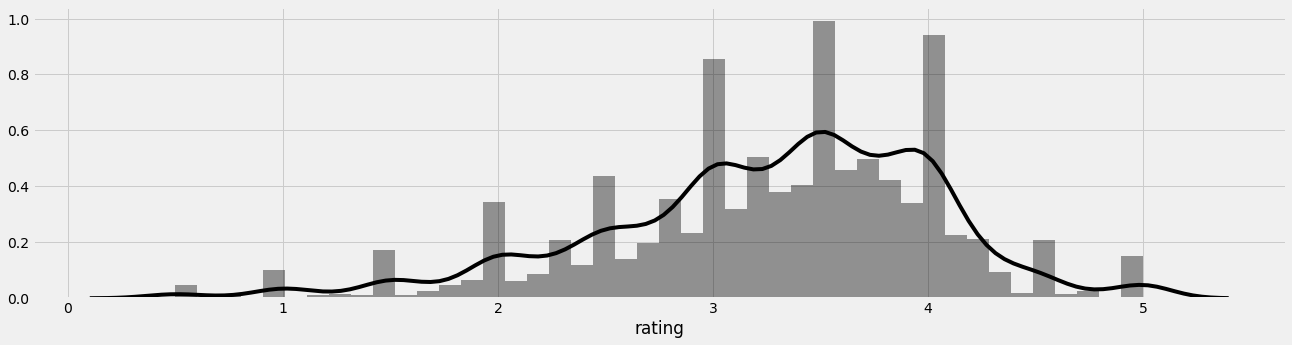

In [37]:
plt.rcParams['figure.figsize'] = (20,5)
plt.style.use('fivethirtyeight')
sbn.distplot(data['rating'], color='black')
plt.show()

## Accroding to this distplot it is clear that most of the ratings are within 3 and 4

In [38]:
# Lets extract the year form the movie title
data['y'] = data['title'].str.split(' ')
data['year'] = data['y'].apply(lambda x : x[-1])

# dropping unnecessary 'y' column in the dataset
data = data.drop(['y'], axis=1)

# removing the starting and ending brackets from the string
data['year'] = data['year'].str.strip(')')
data['year'] = data['year'].str.strip('(')

# Checking values after the extraction of the data
pd.set_option('max_rows', 110)
data['year'].value_counts()

2002    244
1996    240
1995    228
2001    227
2000    225
1998    225
1999    221
1997    217
2004    206
2006    204
1994    198
2003    197
2007    195
2005    195
2009    190
2008    189
2011    180
2010    179
2014    170
2013    166
1993    166
2012    160
2015    148
1988    133
1992    127
1987    123
1990    117
1986    115
1989    115
1991    111
1985    105
1984     77
1982     71
1983     67
1981     64
1980     63
2016     52
1979     48
1977     47
1978     46
1973     41
1974     39
1971     33
1965     32
1962     32
1955     32
1975     32
1959     32
1964     31
1976     31
1966     30
1960     30
1972     30
1963     29
1968     28
1967     28
1953     26
1957     26
1961     25
1958     24
1970     23
1956     22
1969     22
1939     20
1942     20
1954     20
1947     17
1940     17
1951     16
1946     16
1950     16
1948     16
1941     15
1949     15
1937     14
1952     13
1945     13
1944     12
1936     11
1938     10
1931      9
1932      8
1933      8
1934

# Cleaning the dirty values and clean the dataset. 


In [39]:
data['year'] = data['year'].replace(('2007-', 'Despot', 'Things', '1975-1979', 'Road', ''), ('2007', '2016', '2016', '1979', '2002', '1996'))

# convert the data type of the year into integer datatype
data['year'] = data['year'].astype(int)

# checking the head
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [40]:
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


# Removing year from the dataset

In [42]:
# remove the year from the title
data['title'] = data['title'].str.split(' ')
data['title'] = data['title'].apply(lambda x: ' '.join(x[:-1]))

data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of,Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round,Drama|Musical,3.500000,1986
2,'Salem's,Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was,Drama|Romance,4.000000,1997
4,"'burbs,",Comedy,3.176471,1989
